In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
data = pd.read_csv('/content/Dataset_Admission_Predict.csv')
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data.isnull().sum()


,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [7]:
data['Admitted'] = (data['Chance of Admit '] >= 0.5).astype(int)


In [8]:
# Selecting relevant features
features = ['GRE Score', 'CGPA']
target = 'Admitted'
X = data[features]
y = data[target]



In [9]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
# Applying Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [11]:

# Predictions
y_pred = clf.predict(X_test)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)



In [13]:

print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)



Accuracy: 0.91
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.93      0.97      0.95        70

    accuracy                           0.91        80
   macro avg       0.82      0.74      0.77        80
weighted avg       0.90      0.91      0.91        80



In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

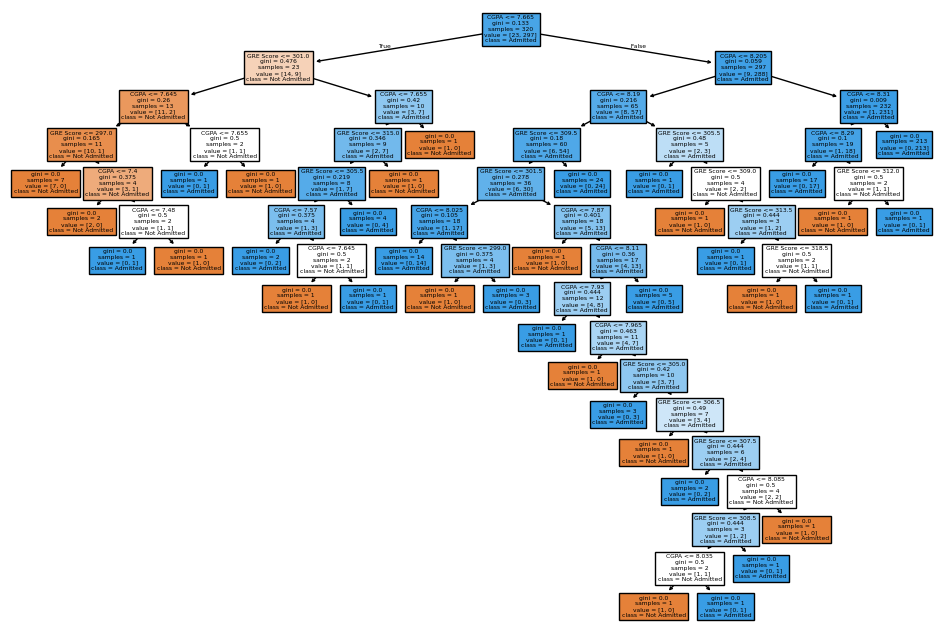

In [15]:
# Visualizing the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=features, class_names=['Not Admitted', 'Admitted'], filled=True)
plt.show()
